In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:

# Generate a synthetic binary classification dataset
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Parameters:
# n_samples=100:

# This specifies the total number of samples (data points) to generate. In this case, 100 samples will be created.
# n_features=2:

# This sets the total number of features (attributes) for each sample. Here, each sample will have 2 features.
# n_informative=2:

# This defines the number of informative features. Informative features are the ones that are actually used to construct the decision boundary or the class labels. In this case, both of the features will be informative.
# n_redundant=0:

# This specifies the number of redundant features. Redundant features are linear combinations of the informative features and do not add new information. Here, there are no redundant features.
# random_state=42:

# This is a seed value for the random number generator. Setting a random_state ensures reproducibility of the dataset, meaning that running the code with the same seed will always generate the same dataset. This is useful for debugging and consistent results.

In [3]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')


In [5]:

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [8]:
# Create a mesh grid for plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [9]:
# Plot the decision boundary by assigning a color to each point in the mesh
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\hafiz\AppData\Local\Temp\ipykernel_9324\4026837238.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100, edgecolor='k', label='Testing data')


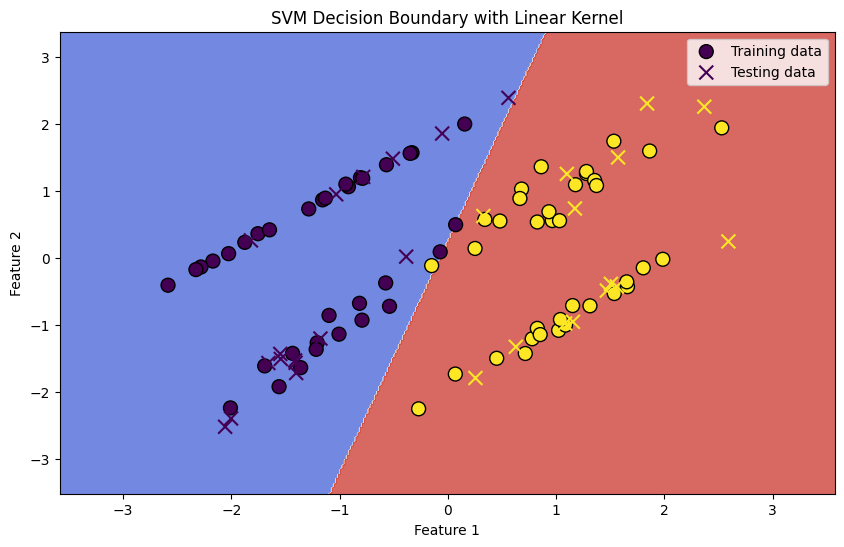

In [10]:

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', s=100, edgecolor='k', label='Training data')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100, edgecolor='k', label='Testing data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.legend()
plt.show()
